# 2.18 Programming for Geoscientists class test - 14:00-16:00 17th December 2015

# Test instructions

* This test contains **4** questions each of which should be answered.
* Write your program in a Python cell just under each question.
* You can write an explanation of your solution as comments in your code.
* You should work with the two data files (VostokStation.txt and last_months_earthquakes.csv) in their original form. They must **not** be modified.
* In each case your solution program must fulfil all of the instructions - please check the instructions carefully and double check that your program fulfils all of the given instructions.
* Save your work regularly.
* At the end of the test you should email your IPython notebook document (i.e. this document) to [Christian T. Jacobs](http://www.imperial.ac.uk/people/c.jacobs10) at c.jacobs10@imperial.ac.uk **and also** [Gerard J. Gorman](http://www.imperial.ac.uk/people/g.gorman) at g.gorman@imperial.ac.uk

## Question 1

1. Generate $x$ coordinates between $1$ and $2$ (inclusive) with spacing $0.01$. The coordinates are given by the formula $x_i = 1 + ih$ where $h=0.01$ and $i$ runs over integers $0,1,...,100$. Compute the $x_i$ values and put them into a python *list*. Use a *for* loop and append each new $x_i$ value to a list that is initially empty.
2. Use a formatted print statement to print out all the values in the list.

In [1]:
h = 0.01
start = 1
end = 2
xcoords = []
for i in range(1+int((end-start)/h)):
    xcoords.append(1+i*h)
    
for x in xcoords:
    print "%g"%x

1
1.01
1.02
1.03
1.04
1.05
1.06
1.07
1.08
1.09
1.1
1.11
1.12
1.13
1.14
1.15
1.16
1.17
1.18
1.19
1.2
1.21
1.22
1.23
1.24
1.25
1.26
1.27
1.28
1.29
1.3
1.31
1.32
1.33
1.34
1.35
1.36
1.37
1.38
1.39
1.4
1.41
1.42
1.43
1.44
1.45
1.46
1.47
1.48
1.49
1.5
1.51
1.52
1.53
1.54
1.55
1.56
1.57
1.58
1.59
1.6
1.61
1.62
1.63
1.64
1.65
1.66
1.67
1.68
1.69
1.7
1.71
1.72
1.73
1.74
1.75
1.76
1.77
1.78
1.79
1.8
1.81
1.82
1.83
1.84
1.85
1.86
1.87
1.88
1.89
1.9
1.91
1.92
1.93
1.94
1.95
1.96
1.97
1.98
1.99
2


## Question 2

The longitudinal wave velocity in a material is given by the equation:
$$V_p = \sqrt{\frac{k+4\mu/3}{\rho}},$$
where $V_p$ is the longitudinal wave velocity, $k$ is the bulk modulus, $\mu$ is the shear modulus and $\rho$ is the density. The shear wave velocity is given by the equation:
$$V_s = \sqrt{\frac{\mu}{\rho}},$$
where $V_s$ is the shear velocity.

1. Write a *function* that takes as arguments $k$, $\mu$ and $\rho$, and returns $V_p$ and $V_s$.
2. Use this function to calculate the longitudinal and shear wave velocities for quartz, clay and water using parameters from the table below. Print out the results using a formatted print statement.

| Material               | Shear modulus (GPa) | Bulk modulus (GPa) | Density (kg/m^3)|
|------------------------|---------------------|--------------------|-----------------|
|Quartz                  | 44                  | 38                 | 2650            | 
|Clay                    | 6.85                | 20.9               | 2580            |
|Water                   | 0                   | 2.29               | 1000            |


In [2]:
from math import sqrt
def calc_material_velocity(k, mu, rho):
    k *= 1.0e9
    mu *= 1.0e9
    
    # Divide to 1000 to convert to km/s
    vp = sqrt((k+4*mu/3.0)/rho)/1000.0
    vs = sqrt(mu/float(rho))/1000.0
    return vp, vs

data = [("Quartz", 44, 38, 2650),
        ("Clay", 6.85, 20.9, 2580),
        ("Water", 0, 2.29, 1000)]

print "Material | Shear modulus (GPa) | Bulk modulus (GPa) | Density (kg/m^3) | Vp (km/s) | Vs (km/s)"
for material in data:
    vp, vs = calc_material_velocity(material[1], material[2], material[3])
    material = material+(vp, vs)
    print "%8s %21g %20g %18g %11.2g %11.2g"%material

Material | Shear modulus (GPa) | Bulk modulus (GPa) | Density (kg/m^3) | Vp (km/s) | Vs (km/s)
  Quartz                    44                   38               2650           6         3.8
    Clay                  6.85                 20.9               2580         3.7         2.8
   Water                     0                 2.29               1000         1.7         1.5


## Question 3

The file [VostokStation.txt](https://raw.githubusercontent.com/ggorman/Introduction-to-programming-for-geoscientists/master/notebook/data/VostokStation.txt) contains data derived from ice core data at Vostok Station. Each line contains the age of the ice, temperature at which the ice formed, the concentration of carbon dioxide and concentration of methane.

1. Write a program to read in the data and store each column in its own array.
2. Create three plots: temperature versus years; carbon dioxide level versus years; and methane level versus years.

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pylab', 'sqrt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


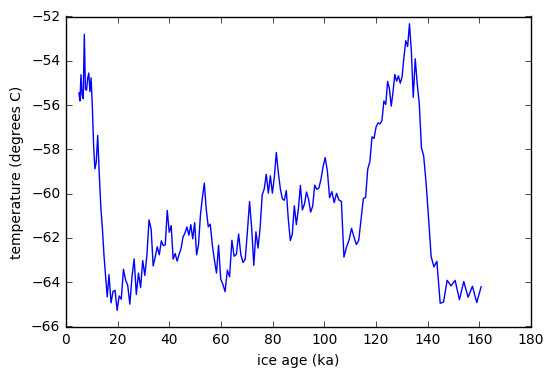

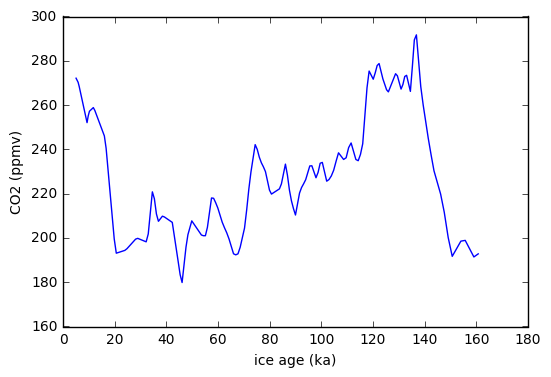

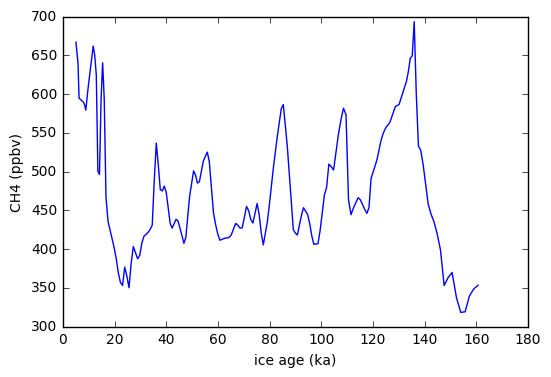

In [3]:
from numpy import array
import pylab
%pylab inline

infile = open("VostokStation.txt", "r")
ice_age = []
temperature = []
CO2 = []
CH4 = []

for line in infile:
    values = line.split(',')
    try:
        idata = [float(value) for value in values]
        ice_age.append(idata[0])
        temperature.append(idata[1])
        CO2.append(idata[2])
        CH4.append(idata[3])
    except:
        pass

ice_age = array(ice_age)
temperature = array(temperature)
CO2 = array(CO2)
CH4 = array(CH4)

pylab.plot(ice_age, temperature)
pylab.xlabel("ice age (ka)")
pylab.ylabel("temperature (degrees C)")
pylab.show()

pylab.plot(ice_age, CO2)
pylab.xlabel("ice age (ka)")
pylab.ylabel("CO2 (ppmv)")
pylab.show()

pylab.plot(ice_age, CH4)
pylab.xlabel("ice age (ka)")
pylab.ylabel("CH4 (ppbv)")
pylab.show()

## Question 4

The file [last_months_earthquakes.csv](https://raw.githubusercontent.com/ggorman/Introduction-to-programming-for-geoscientists/master/notebook/data/last_months_earthquakes.csv) contains a list of earthquakes from around the world over the past month. Each field is delimited by a comma.

1. Write a program that reads in the latitude-longitude coordinates, the depth and the magnitude (written as "mag" in the header) of each earthquake.
2. Use the coordinates to plot the position of each earthquake as an individual point.
3. Ensure that the x-axis is bounded between -180 and 180, and the y-axis is bounded between -90 and 90.
4. Compute the mean earthquake depth and magnitude.


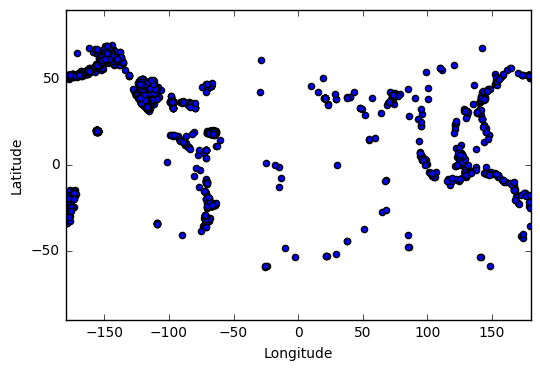

Mean depth: 24.2182
Mean magnitude: 1.65081


In [4]:
def read_data(filename):
    infile = open(filename, "r")

    latitude = []
    longitude = []
    depth = []
    magnitude = []
    
    for line in infile:
        values = line.split(',')
        try:
            data = [float(value) for value in values[1:5]]
            latitude.append(data[0])
            longitude.append(data[1])
            depth.append(data[2])
            magnitude.append(data[3])
        except:
            pass
    
    return array(latitude), array(longitude), array(depth), array(magnitude)

latitude, longitude, depth, magnitude = read_data("last_months_earthquakes.csv")
pylab.scatter(longitude, latitude)
pylab.xlabel("Longitude")
pylab.xlim([-180, 180])
pylab.ylabel("Latitude")
pylab.ylim([-90, 90])
pylab.show()

print "Mean depth: %g"%numpy.mean(depth)
print "Mean magnitude: %g"%numpy.mean(magnitude)